In [1]:
import numpy as np
from qiskit import QuantumCircuit

# 1. A quantum circuit for preparing the quantum state |000> + i |111>
qc_example = QuantumCircuit(3)
qc_example.h(0)          # generate superpostion
qc_example.p(np.pi/2,0)  # add quantum phase
qc_example.cx(0,1)       # 0th-qubit-Controlled-NOT gate on 1st qubit
qc_example.cx(0,2)       # 0th-qubit-Controlled-NOT gate on 2nd qubit

# 2. Add the classical output in the form of measurement of all qubits
qc_measured = qc_example.measure_all(inplace=False)

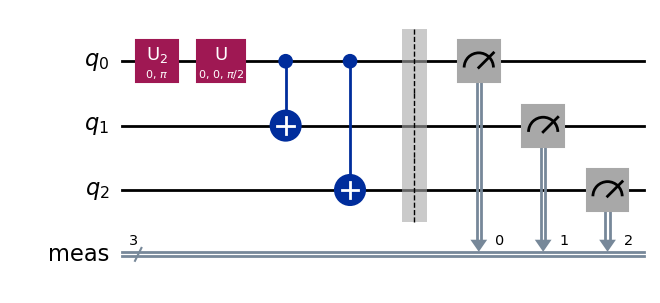

In [2]:
qc_measured.decompose().draw(output="mpl",style="iqp")

In [3]:
# 3. Execute using the Sampler primitive
from qiskit.primitives.sampler import Sampler
sampler = Sampler()
job = sampler.run(qc_measured, shots=1000)
result = job.result()
print(f" > Quasi probability distribution: {result.quasi_dists}")

 > Quasi probability distribution: [{0: 0.506, 7: 0.494}]


In [4]:
# 2. define the observable to be measured 
from qiskit.quantum_info import SparsePauliOp
operator = SparsePauliOp.from_list([("XXY", 1), ("XYX", 1), ("YXX", 1), ("YYY", -1)])

# 3. Execute using the Estimator primitive
from qiskit.primitives import Estimator
estimator = Estimator()
job = estimator.run(qc_example, operator, shots=1000)
result = job.result()
print(f" > Expectation values: {result.values}")

 > Expectation values: [4.]
